<a href="https://colab.research.google.com/github/ChawitTe/Kaggle-competition/blob/main/DADS6003_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# Importing the Libraries
# data visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
test_df = pd.read_csv("/content/test.csv")
train_df = pd.read_csv("/content/train.csv")

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      7391 non-null   float64
 1   x2      7466 non-null   float64
 2   x3      7444 non-null   float64
 3   x4      7407 non-null   float64
 4   x5      7440 non-null   float64
 5   x6      7382 non-null   float64
 6   x7      7419 non-null   float64
 7   x8      7365 non-null   float64
 8   x9      7500 non-null   float64
 9   x10     7421 non-null   float64
 10  x11     7483 non-null   float64
 11  x12     7488 non-null   float64
 12  x13     7370 non-null   float64
 13  x14     7376 non-null   float64
 14  x15     7393 non-null   float64
 15  x16     7407 non-null   float64
 16  x17     7375 non-null   float64
 17  x18     7480 non-null   float64
 18  x19     7355 non-null   float64
 19  x20     7374 non-null   float64
 20  y       7500 non-null   int64  
dtypes: float64(20), int64(1)
memory usage

In [ ]:
# ตรวจสอบค่า Na แต่ละ column
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(20)

,Total,%
x19,145,1.9
x8,135,1.8
x13,130,1.7
x20,126,1.7
x17,125,1.7
x14,124,1.7
x6,118,1.6
x1,109,1.5
x15,107,1.4
x4,93,1.2


In [ ]:
# Drop ทุก rows ที่มีค่า NA
# Acc ดีกว่าเติมค่า NA ด้วย 0
train_df =train_df.dropna()

In [ ]:
# เติมค่า NA ด้วย 0
train_df['x1'].fillna(0, inplace=True)
train_df['x2'].fillna(0, inplace=True)
train_df['x3'].fillna(0, inplace=True)
train_df['x4'].fillna(0, inplace=True)
train_df['x5'].fillna(0, inplace=True)
train_df['x6'].fillna(0, inplace=True)
train_df['x7'].fillna(0, inplace=True)
train_df['x8'].fillna(0, inplace=True)
train_df['x9'].fillna(0, inplace=True)
train_df['x10'].fillna(0, inplace=True)
train_df['x11'].fillna(0, inplace=True)
train_df['x12'].fillna(0, inplace=True)
train_df['x13'].fillna(0, inplace=True)
train_df['x14'].fillna(0, inplace=True)
train_df['x15'].fillna(0, inplace=True)
train_df['x16'].fillna(0, inplace=True)
train_df['x17'].fillna(0, inplace=True)
train_df['x18'].fillna(0, inplace=True)
train_df['x19'].fillna(0, inplace=True)
train_df['x20'].fillna(0, inplace=True)

In [ ]:
# train_df  = train_df.drop("x10", axis=1)
# test_df  = test_df.drop("x10", axis=1)

# train_df  = train_df.drop("x12", axis=1)
# test_df  = test_df.drop("x12", axis=1)

# train_df  = train_df.drop("x8", axis=1)
# test_df  = test_df.drop("x8", axis=1)

train_df  = train_df.drop("x11", axis=1)
test_df  = test_df.drop("x11", axis=1)

train_df  = train_df.drop("x18", axis=1)
test_df  = test_df.drop("x18", axis=1)

train_df  = train_df.drop("x20", axis=1)
test_df  = test_df.drop("x20", axis=1)

train_df  = train_df.drop("x5", axis=1)
test_df  = test_df.drop("x5", axis=1)

train_df  = train_df.drop("x4", axis=1)
test_df  = test_df.drop("x4", axis=1)

train_df  = train_df.drop("x13", axis=1)
test_df  = test_df.drop("x13", axis=1)

train_df  = train_df.drop("x1", axis=1)
test_df  = test_df.drop("x1", axis=1)

train_df  = train_df.drop("x16", axis=1)
test_df  = test_df.drop("x16", axis=1)

train_df  = train_df.drop("x17", axis=1)
test_df  = test_df.drop("x17", axis=1)

train_df  = train_df.drop("x19", axis=1)
test_df  = test_df.drop("x19", axis=1)

In [ ]:
# Drop column Y 
X_train = train_df.drop("y", axis=1)
Y_train = train_df["y"]
X_test  = test_df

print(X_train.shape, Y_train.shape, X_test.shape)

(5985, 10) (5985,) (2500, 10)


In [ ]:
# Stochastic Gradient Descent
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

In [ ]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [ ]:
# Decision_Tree
# Best ได้ค่า score ดีสุด
decision_tree = DecisionTreeClassifier()
decision_tree = decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [ ]:
# K Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [ ]:
# LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# Linear Support Vector Machine
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
# Check Model score
results = pd.DataFrame({
    'Model': [ 'Random Forest', 
              'Stochastic Gradient Decent',
             'Decision Tree', 'K Nearest Neighbor'],
    'Score': [ acc_random_forest, acc_sgd, acc_decision_tree,acc_knn]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
100.00,Random Forest
100.00,Decision Tree
91.50,K Nearest Neighbor
74.94,Stochastic Gradient Decent


In [ ]:
decision_tree = decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
pred_decision_tree = pd.DataFrame({
    "Expected": Y_pred
})
pred_decision_tree.insert(0, 'Id', range(1, 1 + len(pred_decision_tree)))
pred_decision_tree.to_csv('submission_pred_decision_tree.csv', index=False)

In [ ]:
## วิธีเพิ่ม column "Id" เข้า dataframe

pred_decision_tree = pd.DataFrame({
    "Expected": Y_pred
})
pred_decision_tree.insert(0, 'Id', range(1, 1 + len(pred_decision_tree)))
print(pred_decision_tree)

        Id  Expected
0        1         0
1        2         0
2        3         0
3        4         0
4        5         0
...    ...       ...
2495  2496         1
2496  2497         0
2497  2498         0
2498  2499         1
2499  2500         0

[2500 rows x 2 columns]


In [ ]:
random_forest = random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
pred_random_forest = pd.DataFrame({
    "Expected": Y_pred
})
pred_random_forest.insert(0, 'Id', range(1, 1 + len(pred_random_forest)))
pred_random_forest.to_csv('submission_pred.csv', index=False)

In [ ]:
sgd = sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
pred_sgd = pd.DataFrame({
    "Expected": Y_pred
})
pred_sgd.to_csv('submission_pred.csv', index=False)

In [ ]:
# Feature Importance
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(20)

,importance
feature,
x2,0.237
x15,0.126
x3,0.121
x9,0.121
x14,0.070
x7,0.055
x6,0.053
x10,0.039
x12,0.030


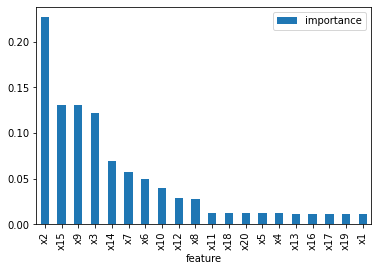

In [ ]:
importances.plot.bar()

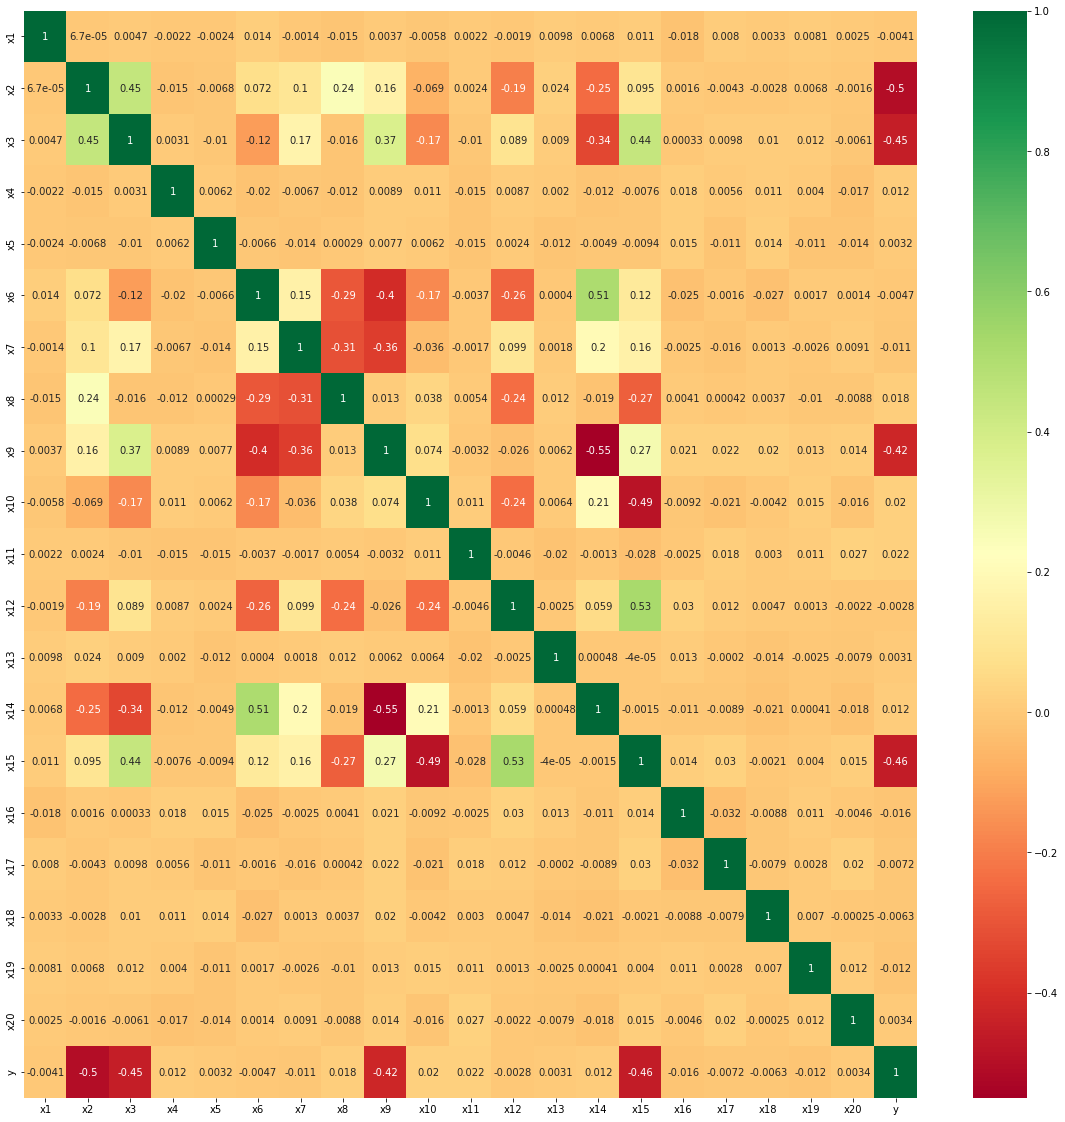

In [ ]:
corrmat = train_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")